In [1]:
# ASTR 400 B 
# In Class Lab 2

# Import Modules 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.integrate import quad # For integration
# Documentation and examples for quad : 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html
# https://www.tutorialspoint.com/scipy/scipy_integrate.htm

## Part A:  Schechter Fxn

The galaxy luminosity function in the nearby universe is well described by a Schechter Function:

\begin{equation}
\Phi(M)dM = ( 0.4 \, ln10 ) \, \phi_\ast \, 10^{0.4(M_\ast - M)(\alpha +1)} e^{-10^{0.4(M_\ast - M)}} dM
\end{equation}

With the following parameters from Smith+(2009 MNRAS 397, 868),  for Field Galaxies in SDSS + UKIRT at z$\sim$0.1 in the Kband:


 $\phi_\ast$ =1.66 $  \times 10^{-2}$  $h^3$ Mpc$^{-3}$

 $\alpha$ =  -0.81 


  M$_\ast$ =  M$_k^\ast$= -23.19  - 5*log($h$)
  
 $h$ = the Hubble constant in units of 100 km/s/Mpc . At z=0 this is 0.7. But we are going to se $h$=1 here. Units will then be in "comoving" coordinates.
  
  This function is defined for you below:

In [2]:
def schechter_M(m,phi_star=0.0166,m_star=-23.19,alpha=-0.81):
    """ Function that computes the Schechter Luminosity Function 
    for a given magnitude, assuming default parameters for field 
    galaxies in SDSS at z~0.1 in the Kband (Smith+2009)
    
    Inputs
        m : an array of floats
            an array of Kband magnitudes  (assumes -5*log(h) implicitly)
        phi_star:  float
            normalization of Schechter fxn (h^3 Mpc^-3)
        m_star:  float 
            knee of the Schechter fxn (K-band magnitude, 
            assumes -5*log(h) implicitly)
        alpha:  float
            faint end slope of the Schechter fxn
    
    Output:
        schechterM: float
            number density of galaxies (comoving units) 
            at the given magnitude m - 5*log(h)
            

    """
    # You should divide up long functions instead of writing them as one long set
    
    # Grouping all constants together
    a = 0.4*np.log(10)*phi_star
    
    # The Power Law, controlling the faint end slope
    b = 10**(0.4*(m_star-m)*(alpha+1.0)) 
    
    # The Exponential controlling the high mass end behavior
    c = np.exp(-10**(0.4*(m_star-m))) 
    
    # schechter function for the given magnitude
    schechterM = a*b*c 
    # i.e. don't do the below
    # return 0.4*np.log(10)*phistar*10**(0.4*(Mstar - M)*(alpha +1.0))*np.exp(-10**(0.4*(Mstar - M)))

    return schechterM

# Q1 

Utilizing the defined function, plot the Schechter Function using the above parameter values over a magnitude range of -17 to -26. 
Try to reproduce the black solid line in Smith+2009 MNRAS 397,868 [UKIDSS Survey] Figure below.


![Smith](./Smith09.png)

# Q2 

Galaxies in the Virgo Cluster have different parameters, like $\alpha$=-1.35  (Ferrarese+2016 ApJ 824).

Overplot the Schechter Function with this new value of $\alpha$.  

Try a smaller value of $\alpha = -0.6$.

How does the function change?  What does this mean? 


In [3]:
# Create an array to store Kband Magnitudes from -26 to -17
mk = np.arange(-26, -17, 0.1)
print(mk)

[-26.  -25.9 -25.8 -25.7 -25.6 -25.5 -25.4 -25.3 -25.2 -25.1 -25.  -24.9
 -24.8 -24.7 -24.6 -24.5 -24.4 -24.3 -24.2 -24.1 -24.  -23.9 -23.8 -23.7
 -23.6 -23.5 -23.4 -23.3 -23.2 -23.1 -23.  -22.9 -22.8 -22.7 -22.6 -22.5
 -22.4 -22.3 -22.2 -22.1 -22.  -21.9 -21.8 -21.7 -21.6 -21.5 -21.4 -21.3
 -21.2 -21.1 -21.  -20.9 -20.8 -20.7 -20.6 -20.5 -20.4 -20.3 -20.2 -20.1
 -20.  -19.9 -19.8 -19.7 -19.6 -19.5 -19.4 -19.3 -19.2 -19.1 -19.  -18.9
 -18.8 -18.7 -18.6 -18.5 -18.4 -18.3 -18.2 -18.1 -18.  -17.9 -17.8 -17.7
 -17.6 -17.5 -17.4 -17.3 -17.2 -17.1]


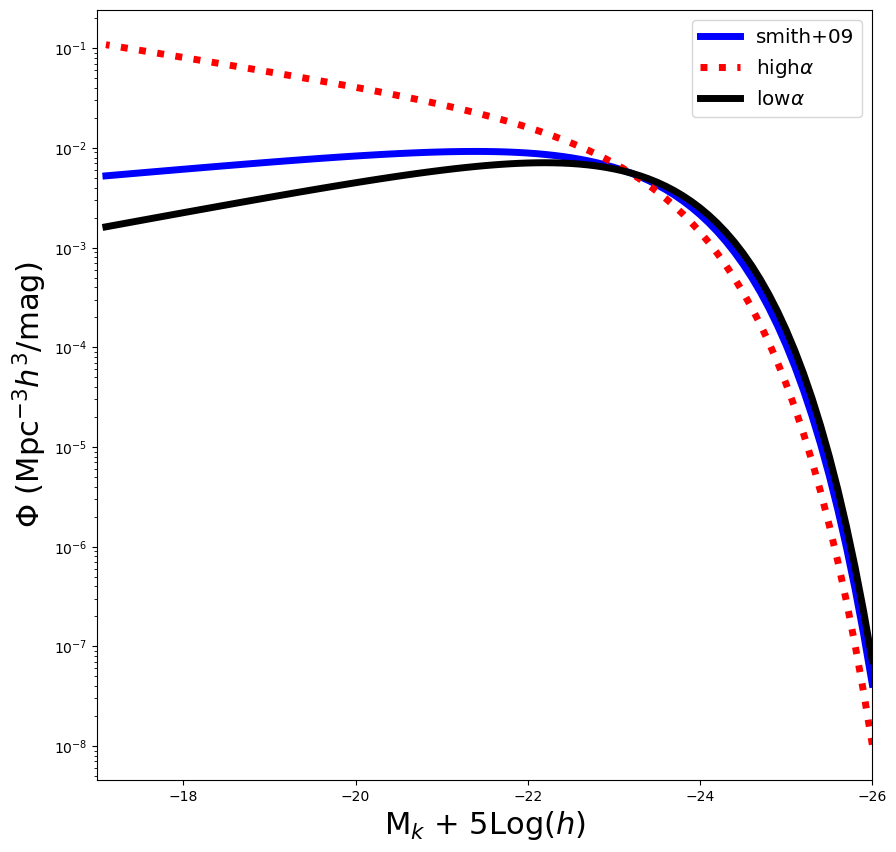

In [4]:
# Plot the Schechter Function

fig = plt.figure(figsize=(10,10))  # sets the scale of the figure
ax = plt.subplot(111) 

# Plot the default values (y axis log)
# ADD HERE
ax.semilogy(mk, schechter_M(mk), color = 'blue', linewidth = 5, label = 'smith+09')
# Q2 solutions: change alpha
# ADD HERE
ax.semilogy(mk, schechter_M(mk, alpha = -1.35), color = 'red', linewidth = 5, linestyle = ':', label = r'high$\alpha$')
ax.semilogy(mk, schechter_M(mk, alpha = -0.6), color = 'black', linewidth = 5, linestyle = '-', label = r'low$\alpha$')


# Add labels
plt.xlabel(r'M$_k$ + 5Log($h$)', fontsize=22)
plt.ylabel(r'$\Phi$ (Mpc$^{-3}h^3$/mag)', fontsize=22)

#set axis limits
plt.xlim(-17,-26)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')

# Save to a file
plt.savefig('Schechter_M.png')



# Q3

Build a function to compute the Schechter Function in terms of luminosity.

Use `quad` to numerically integrate the function to compute the fraction of the luminosity that lies above L* in the following three cases:  

$\alpha$=-0.7 (default), $\alpha$=-0.6, $\alpha$=1.85. 


Schechter Function $\Phi(L) = \frac{n_\ast}{L_\ast} (\frac{L}{L_\ast})  ^{\alpha}  e^{-L/L_\ast}$

$n_\ast$ = 0.008  $h^3$ Mpc$^{-3}$

$L_\star = 1.4 \times 10^{10} L_\odot$

In [5]:
def schechter_L(lum, n_star=8e-3, l_star=1.4e10, alpha=-0.7):
    """ Function that computes the Schechter Luminosity Function
        for a given luminosity. Defaults are from Sparke & Gallagher 
    
    Inputs:
        lum: array of floats
            Array of Luminosities (Lsun)
        
        n_star: float
            Normalization of the Schechter fxn (h^3 Mpc^-3)
            
        l_star: float
            Characteristic luminosity (knee of the Schechter fxn) 
            in units of Lsun
            
        alpha: float
            Faint end slope
            
     Outputs:
         schechterL: float
             number density of galaxies for a given luminosity 
             (h^3 * Mpc^-3/Lsun)
    
    """
    
    # Break down the equation into parts
    a = n_star/l_star
    b = np.exp(-lum/l_star)
    c = (lum/l_star)**alpha
    
    
    
    schechterL = a*b*c # Template  ADD HERE
    
    return schechterL



In [6]:
# Understanding lambda functions
# Short cut -- defines and evaluates a function in one line ! 

# lambda says that a function follows, where the variables are a and b, 
# and the function to be evaluated is a*b
x = lambda a, b : a * b
print(x(5, 6))

30


In [7]:
# Example Usage of quad and lambda

# Version 1
print(quad(np.sin, 0, np.pi))

# Version 2
f = lambda x: np.sin(x)
print(quad(f, 0, np.pi))

# Version 3
def ex(x):
    return np.sin(x) 

print(quad(lambda x: ex(x), 0, np.pi))



(2.0, 2.220446049250313e-14)
(2.0, 2.220446049250313e-14)
(2.0, 2.220446049250313e-14)


## Part B: IMF 

Create a function called `imf` that defines the IMF: 

\begin{equation}
\xi(M) = \xi_0 (M/M_\odot)^{-\alpha}
\end{equation}


where the default is the Salpeter IMF $\alpha = 2.35$ 

The function should take as input an array of stellar masses, M, and a minimum and maximum mass interval. 

You will need to determine the normalization, $\xi_0$, by integrating this equation over mass from m_min= 0.1 to m_max = 120 M$_\odot$
and setting the result to 1.  

The function should then return $\xi(M)$, which will now represent the fractional number of stars. 

Integration:

`quad(lambda x:  fxn(x),xmin,xmax)`

quad returns an array with 2 values. you want the first value. 
Note I've used a "lambda" expression.   Python's lambda expressions allow a function to be created and passed around all in one line of code

In [11]:
def imf(m, m_min=0.1, m_max=120, alpha=2.35):
    
    ''' Function that defines the IMF (default is Salpeter). 
        The function is normalized such that 
        it returns the fraction of stars within some mass 
        interval m_min to m_max.
        
        Inputs:
            m: array of floats 
                Array of stellar masses (Msun)
            
            m_min:  float
                minimum mass (Msun)
            
            m_max : float
                maximal mass (Msun)
                
            alpha : float
                power law. default is the Salpeter IMF
                
        Output:
            norm_imf: float
                normalized fraction of stars at a given m
    '''
    
    # Determine the normalization for the imf
    to_normalize = quad(lambda m: m ** (-alpha), m_min, m_max)

    # Normalization factor
    norm = 1/to_normalize[0]
    
    # Define the normalized imf
    norm_imf = norm * m ** (-alpha)
    
    return norm_imf
    

In [12]:
l_upper = quad(lambda L: L*schechter_L(L), 1.4e10, 1e14) #luminosity density above L*
print(l_upper[0])

#total luminosity density
l_total = quad(lambda L: L*schechter_L(L), 0.1, 1e14)
print(l_total[0])

ratio = l_upper[0]/l_total[0]
print("Ratio (>L*)/Ltotal", np.round(ratio, 3))

49678654.46727107
100516717.98628198
Ratio (>L*)/Ltotal 0.494


## Q1: 
Double Check: if you integrate your function from 0.1 to 120 you should return 1.0 


In [14]:
test = quad(lambda m: imf(m), 0.1, 120)
print(np.round(test[0], 3))

1.0


## Q2: 
Integrate your normalized function to compute the fractional number of stars with stellar masses greater than the sun and less 
than 120 M$_\odot$.

In [15]:
frac = quad(lambda m: imf(m), 1, 120)
print(np.round(frac[0], 3))

0.045


In [16]:
# cluster with 5000 stars 
5000 * np.round(frac[0], 3) # not accurate in terms of number of stars, only .1 solar mass
                            # Better said in term of mass

225.0

## Q3:

How might you modify the above to return the fraction of MASS in stars from 0.1Msun to 120 Msun ? instead of fraction of the total numbers of stars.

In [17]:
def imf_Mass(m, m_min=0.1, m_max=120, alpha=2.35):
    
    ''' Function that defines the IMF (default is Salpeter). 
        The function is normalized such that 
        it returns the fraction of mass within some range of mass 
        interval m_min to m_max.
        
        Inputs:
            m: array of floats 
                Array of stellar masses (Msun)
            m_min:  float
                minimum mass (Msun)
            m_max : float
                maximal mass (Msun)
            alpha : float
                power law. default is the Salpeter IMF
                
        Output:
            norm_imf_mass: float
                normalized fraction of mass over a given m range 
    '''
    # Determine the normalization for the imf
    to_normalize = quad(lambda m: m * m ** (-alpha), m_min, m_max)

    # Normalization factor
    norm = 1/to_normalize[0]

    # Define the normalized imf
    norm_imf_mass = norm * m * m ** (-alpha)
    
    return norm_imf_mass

In [18]:
# Determine the fraction of mass in stars that are more massive than the Sun
frac2 = quad(lambda m: imf_Mass(m), 1, 120)
print(np.round(frac2[0], 3))

0.396


In [19]:
# 5000 Msun cluster - how much mass is between 1 Msun and 120 Msun
print(5000 * np.round(frac2[0], 3))

1980.0
